# Trabalho 2 — INF-0618 Deep Learning   

#### Membros:
- Leonardo Cesar Silva dos Santos
- Fernando Augusto Cardoso Candalaft


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os

## Leitura e ajuste dos dados & Download do modelo

In [5]:
# Carregando os dados e fazendo a divisao de treino e teste
!curl -o dermamnist.npz https://zenodo.org/records/10519652/files/dermamnist.npz?download=1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.8M  100 18.8M    0     0  10.1M      0  0:00:01  0:00:01 --:--:-- 10.1M


In [6]:
# Carrega a base de dados
dermamnist = np.load("./dermamnist.npz") # O arquivo chama-se dermamnist.npz (definido no curl)

# Separa em conjuntos de treino, validacao e teste
x_train = dermamnist["train_images"]
y_train = dermamnist["train_labels"]

x_val = dermamnist["val_images"]
y_val = dermamnist["val_labels"]

x_test = dermamnist["test_images"]
y_test = dermamnist["test_labels"]

In [8]:
# Pre-processamento dos dados

# Normalizando os dados
x_train_norm = x_train / 255.0
x_val_norm = x_val / 255.0
x_test_norm = x_test / 255.0

# Ajustando o formato da variavel y para one-hot encoding
n_classes = 7

y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_val_ohe = tf.keras.utils.to_categorical(y_val, num_classes=n_classes)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=n_classes)

In [9]:
# Fazendo o download do modelo
base_path = "/content/drive/MyDrive/Colab Notebooks/mineracao_dados_complexos/mdc/08_deep_learning/test02/artefatos/"
best_model_path = os.path.join(base_path, "baseline_model_variation_N1.h5")

best_model_path

'/content/drive/MyDrive/Colab Notebooks/mineracao_dados_complexos/mdc/08_deep_learning/test02/artefatos/baseline_model_variation_N1.h5'

In [10]:
model_N1 = tf.keras.models.load_model(best_model_path)

## Questão 01. Descrição do melhor modelo treinado sobre a base de dados DermaMNIST

O modelo treinado possui a seguinte arquitetura:

```
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 conv2d_3 (Conv2D)           (None, 26, 26, 12)        336       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 12)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 13, 13, 12)        48        
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 6)         294       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 6)           0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 6, 6, 6)           24        
 chNormalization)                                                
                                                                 
 flatten_3 (Flatten)         (None, 216)               0         
                                                                 
 dense_3 (Dense)             (None, 28)                6076      
                                                                 
 dense_4 (Dense)             (None, 7)                 203       
                                                                 
=================================================================
Total params: 6981 (27.27 KB)
Trainable params: 6945 (27.13 KB)
Non-trainable params: 36 (144.00 Byte)
```

- **1a camada: Conv2D**: esta camada é usada para extrair as *features* de mais baixo nível das nossas imagens de entrada, como bordas etc.

- **2a camada: MaxPooling2D**: esta camada é usada para fazer o *downsampling* da saída da camada anterior, de modo que ajuda a reduzir o custo computacional e em certo ponto a controlar o *overfitting* da rede.

- **3a camada: BatchNormalization**: esta camada é utilizada para normalizar os dados de saída da camada anterior, de modo que ajuda a melhorar a estabilidade da rede e também a velocidade com que a rede treina.

- **4a camada: Conv2D**: outra camada usada para extrair características de suas entradas, porém agora aprende padrões mais complexos por estar numa camada mais profunda.

- **5a camada: MaxPooling2D**

- **6a camada: BatchNormalization**

- **7a camada: Flatten**: camada usada para transformar os dados do espaço 2D para o espaço 1D, de modo a conectar a camada convolucional com a camada densa.

- **8a camada: Dense**: camada *fully connected* usada para aprender padrões com base nos dados de entrada

- **9a camada: Dense**: camada densa usada para retornar as probabilidade de cada classe de acordo com a imagem de entrada.

**Resultado do modelo descrito sobre o conjunto de teste:**

```
{'model': {'accuracy': 0.7122194766998291,
           'data': 'test',
           'description': 'Primeira variacao do modelo baseline',
           'loss': 0.7722233533859253,
           'name': 'baseline_variation_N1'}}
```

In [19]:
!pip install visualkeras

In [17]:
from pprint import pprint

import visualkeras

In [13]:
# Testando o funcionamento do modelo
def print_accuracy_and_loss(model, name, description, data_type,
                            xval=x_val_norm, yval=y_val_ohe): # x_val_norm, y_val_ohe

    loss, acc = model.evaluate(xval, yval)

    validation_results = {
        "model": {
            "data": data_type,
            "name": name,
            "description": description,
            "loss": loss,
            "accuracy": acc
        }
    }

    pprint(validation_results)

print_accuracy_and_loss(model_N1,
                        "baseline_variation_N1",
                        "Primeira variacao do modelo baseline",
                        "test",
                        xval=x_test_norm, yval=y_test_ohe) # Modelo funcionando

63/63 [==============================] - 1s 8ms/step - loss: 0.7722 - accuracy: 0.7122
{'model': {'accuracy': 0.7122194766998291,
           'data': 'test',
           'description': 'Primeira variacao do modelo baseline',
           'loss': 0.7722233533859253,
           'name': 'baseline_variation_N1'}}


In [14]:
# Sumario do modelo
model_N1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 12)        336       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 12)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 13, 13, 12)        48        
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 6)         294       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 6)           0         
 g2D)                                                            
                                                      

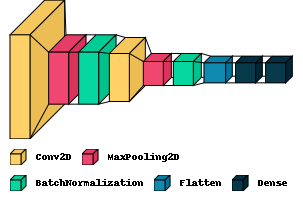

In [18]:
visualkeras.layered_view(model_N1, legend=True)

## Questão 02.

Vamos usar o método **Grad-CAM** apresentado em aula como primeiro método de visualização.

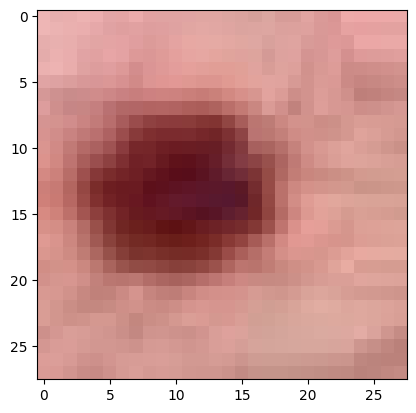

In [20]:
plt.imshow(x_test[0])

In [21]:
x_test.shape

(2005, 28, 28, 3)

In [22]:
from tensorflow import keras
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

In [26]:
from IPython.display import Image, display
import matplotlib

In [25]:
display(x_test[0])

array([[[238, 182, 181],
        [231, 175, 174],
        [233, 175, 174],
        ...,
        [237, 169, 168],
        [237, 169, 168],
        [235, 170, 168]],

       [[238, 182, 181],
        [235, 179, 178],
        [234, 176, 175],
        ...,
        [229, 161, 160],
        [227, 162, 160],
        [227, 162, 160]],

       [[230, 174, 173],
        [232, 176, 175],
        [232, 174, 173],
        ...,
        [235, 167, 166],
        [234, 169, 167],
        [234, 169, 167]],

       ...,

       [[212, 151, 146],
        [217, 156, 151],
        [218, 157, 152],
        ...,
        [198, 143, 136],
        [192, 135, 128],
        [186, 129, 122]],

       [[220, 157, 152],
        [219, 158, 153],
        [215, 154, 149],
        ...,
        [187, 132, 125],
        [187, 130, 123],
        [187, 130, 123]],

       [[218, 155, 150],
        [217, 154, 149],
        [209, 148, 143],
        ...,
        [188, 133, 126],
        [193, 136, 129],
        [196, 139, 132]]], dtype=uint8)

In [28]:
def get_img_array(img, size):
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

In [30]:
SIZE = (28, 28)
test_img = x_test_norm[0]
get_img_array(test_img, size=SIZE)

array([[[[0.93333334, 0.7137255 , 0.70980394],
         [0.90588236, 0.6862745 , 0.68235296],
         [0.9137255 , 0.6862745 , 0.68235296],
         ...,
         [0.92941177, 0.6627451 , 0.65882355],
         [0.92941177, 0.6627451 , 0.65882355],
         [0.92156863, 0.6666667 , 0.65882355]],

        [[0.93333334, 0.7137255 , 0.70980394],
         [0.92156863, 0.7019608 , 0.69803923],
         [0.91764706, 0.6901961 , 0.6862745 ],
         ...,
         [0.8980392 , 0.6313726 , 0.627451  ],
         [0.8901961 , 0.63529414, 0.627451  ],
         [0.8901961 , 0.63529414, 0.627451  ]],

        [[0.9019608 , 0.68235296, 0.6784314 ],
         [0.9098039 , 0.6901961 , 0.6862745 ],
         [0.9098039 , 0.68235296, 0.6784314 ],
         ...,
         [0.92156863, 0.654902  , 0.6509804 ],
         [0.91764706, 0.6627451 , 0.654902  ],
         [0.91764706, 0.6627451 , 0.654902  ]],

        ...,

        [[0.83137256, 0.5921569 , 0.57254905],
         [0.8509804 , 0.6117647 , 0.5921569 ]

In [57]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(input_img, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.img_to_array(input_img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = matplotlib.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Display Grad CAM
    fig, axes = plt.subplots(1, 2)

    axes[0].imshow(img, cmap="gray")
    axes[1].imshow(superimposed_img, cmap="gray")
    axes[0].set_title("Original image")
    axes[1].set_title("Superimposed image")

    plt.savefig(cam_path)
    plt.show()

In [47]:
# Clone model
model = tf.keras.models.clone_model(model_N1)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 12)        336       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 12)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 13, 13, 12)        48        
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 6)         294       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 6)           0         
 g2D)                                                            
                                                      

In [49]:
# Prepare image
img_array = get_img_array(test_img, size=SIZE)

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)

last_conv_layer_name = "conv2d_4"

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

1/1 [==============================] - 0s 94ms/step


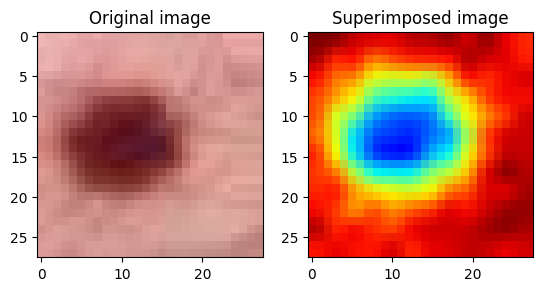

In [56]:
save_and_display_gradcam(test_img, heatmap)

In [66]:
# Separando as 10 imagens de duas classes
np.unique( np.argmax(y_test_ohe, axis=1) )

array([0, 1, 2, 3, 4, 5, 6])

In [82]:
classe1 = 2
classe2 = 5

x_test_classe1 = x_test_norm[np.argmax(y_test_ohe, axis=1) == classe1]
x_test_classe2 = x_test_norm[np.argmax(y_test_ohe, axis=1) == classe2]

y_test_classe1 = np.argmax( y_test_ohe[np.argmax(y_test_ohe, axis=1) == classe1], axis=1 )
y_test_classe2 = np.argmax( y_test_ohe[np.argmax(y_test_ohe, axis=1) == classe2], axis=1 )

In [85]:
preds1 = model_N1.predict(x_test_classe1).argmax(axis=1)
preds2 = model_N1.predict(x_test_classe2).argmax(axis=1)

42/42 [==============================] - 1s 13ms/step


In [87]:
len(y_test_classe1), len(y_test_classe2)

(220, 1341)

In [88]:
(preds1 == y_test_classe1).sum(), (preds2 == y_test_classe2).sum()

(91, 1244)

In [116]:
slicer = 2
idx_tp_classe1 = np.where(preds1 == y_test_classe1)[0][:slicer]
idx_fp_classe1 = np.where(preds1 != y_test_classe1)[0][:slicer]

idx_tp_classe2 = np.where(preds2 == y_test_classe2)[0][:slicer]
idx_fp_classe2 = np.where(preds2 != y_test_classe2)[0][:slicer]

In [117]:
tp_images_classe1 = x_test_classe1[idx_tp_classe1]
fp_images_classe1 = x_test_classe1[idx_fp_classe1]

tp_images_classe2 = x_test_classe2[idx_tp_classe2]
fp_images_classe2 = x_test_classe2[idx_fp_classe2]

In [118]:
tp_imgs_cl1 = zip(idx_tp_classe1, tp_images_classe1)
fp_imgs_cl1 = zip(idx_fp_classe1, fp_images_classe1)

tp_imgs_cl2 = zip(idx_tp_classe2, tp_images_classe2)
fp_imgs_cl2 = zip(idx_fp_classe2, fp_images_classe2)

In [119]:
len(tp_images_classe2)

2

In [120]:
SIZE = (28, 28)

def apply_gradcam_vis(base_model, input_image, size=SIZE, last_conv_layer_name="conv2d_4"):

    # Prepare image
    img_array = get_img_array(input_image, size=size)

    # Remove last layer's softmax
    model = tf.keras.models.clone_model(base_model)
    model.layers[-1].activation = None

    last_conv_layer_name = "conv2d_4"

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    save_and_display_gradcam(input_image, heatmap)

2


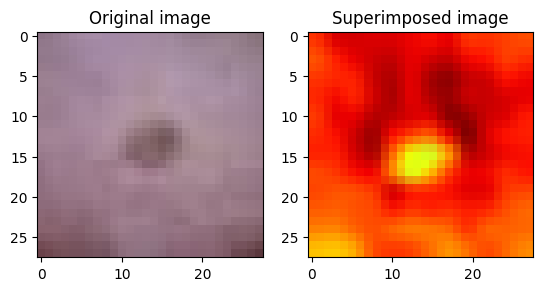

2


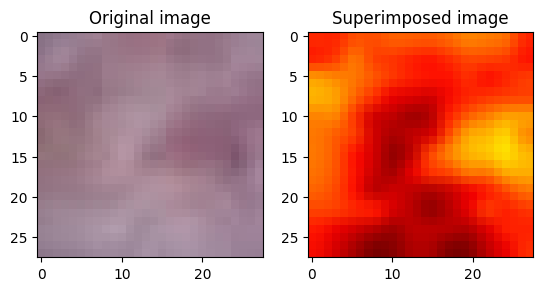

In [121]:
for idx, image in tp_imgs_cl1:
    print(y_test_classe1[idx])
    apply_gradcam_vis(model_N1, image, size=SIZE, last_conv_layer_name="conv2d_4")

2


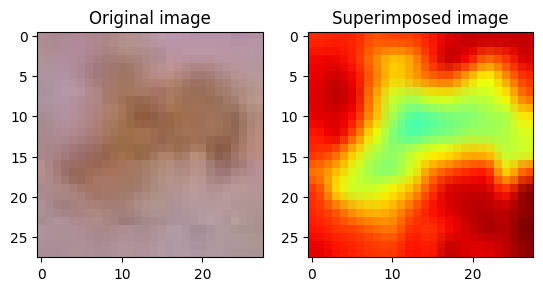

2


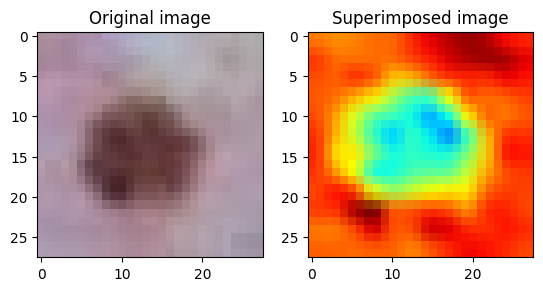

In [122]:
for idx, image in fp_imgs_cl1:
    print(y_test_classe1[idx])
    apply_gradcam_vis(model_N1, image, size=SIZE, last_conv_layer_name="conv2d_4")

5


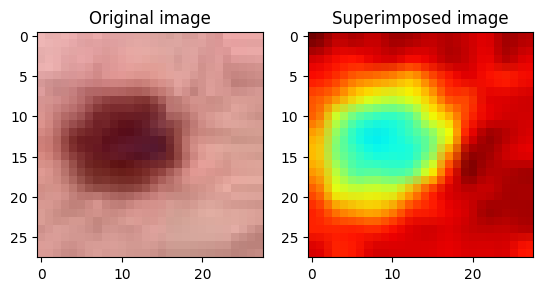

5


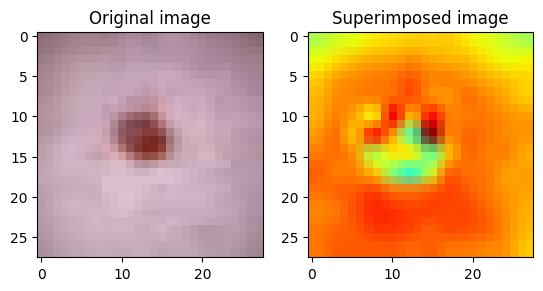

In [123]:
for idx, image in tp_imgs_cl2:
    print(y_test_classe2[idx])
    apply_gradcam_vis(model_N1, image, size=SIZE, last_conv_layer_name="conv2d_4")

5


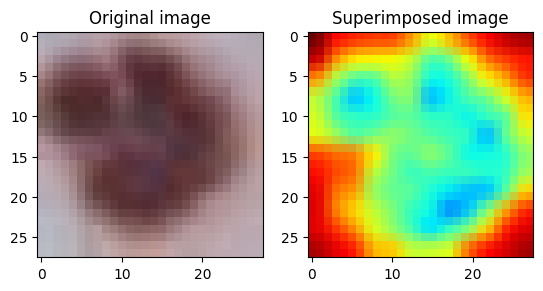

5


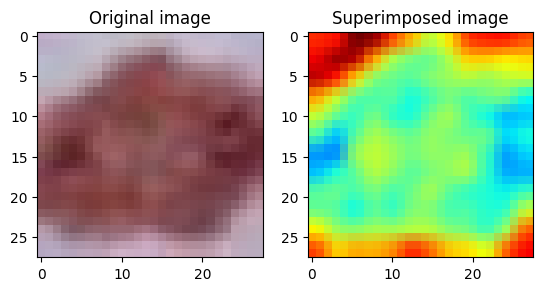

In [124]:
for idx, image in fp_imgs_cl2:
    print(y_test_classe2[idx])
    apply_gradcam_vis(model_N1, image, size=SIZE, last_conv_layer_name="conv2d_4")